In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wkp = pd.read_csv('./data/경제활동인구_시도_handling.csv',index_col=0,encoding='utf-8')
sal = pd.read_csv('./data/월평균_임금_handling.csv',index_col=0,encoding='utf-8')
peo = pd.read_csv('./data/시도별_인구수_데이터_handling.csv',index_col=0,encoding='utf-8')
df = pd.read_csv('./data/지역별_연도별_평당_분양_가격.csv',index_col=0,encoding='utf-8')

In [3]:
peo.행정구역.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [4]:
loc = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도']

In [5]:
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
1610,전북,2021,11,8976.0
1611,전남,2021,11,9764.7
1612,경북,2021,11,10434.6
1613,경남,2021,11,10692.0


In [6]:
df.지역명 = df.지역명.replace({
    '서울':'서울특별시',
    '부산':'부산광역시',
    '대구':'대구광역시',
    '인천':'인천광역시', 
    '광주':'광주광역시', 
    '대전':'대전광역시', 
    '울산':'울산광역시',       
    '세종':'세종특별자치시', 
    '경기':'경기도', 
    '강원':'강원도', 
    '충북':'충청북도',
    '충남':'충청남도', 
    '전북':'전라북도', 
    '전남':'전라남도', 
    '경북':'경상북도',
    '경남':'경상남도', 
    '제주':'제주특별자치도'
    })

In [7]:
df = df.rename(columns={'지역명':'행정구역'})

In [8]:
wkp.행정구역 = wkp.행정구역.replace({'제주도':'제주특별자치도'})

In [9]:
# df.drop(columns='월',inplace=True)
# df.info()

In [10]:
wkp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    204 non-null    object
 1   년도      204 non-null    int64 
 2   인구수     204 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ KB


In [11]:
wkp.년도 = wkp.년도.astype(str)

In [12]:
wkp.rename(columns={'년도':'연도','인구수':'경제활동인구'},inplace=True)

In [13]:
wkp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    204 non-null    object
 1   연도      204 non-null    object
 2   경제활동인구  204 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [14]:
peo.rename(columns={'년도':'연도'},inplace=True)
peo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    204 non-null    object
 1   연도      204 non-null    int64 
 2   인구수     204 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ KB


In [15]:
sal.rename(columns={'년도':'연도'},inplace=True)
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    187 non-null    object
 1   연도      187 non-null    int64 
 2   소득      187 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.8+ KB


In [16]:
df.연도 = df.연도.astype(str)

In [17]:
dataFrame_list = [wkp,peo,sal]

In [18]:
df = df.merge(wkp,how='left',on=['연도','행정구역'])
df.head(1)

,행정구역,연도,월,평당분양가격,경제활동인구
0,서울특별시,2013,12,18189.0,5355000


In [19]:
peo.연도 = peo.연도.astype(str)

In [20]:
df = df.merge(peo,how='left',on=['연도','행정구역'])
df.head(1)

,행정구역,연도,월,평당분양가격,경제활동인구,인구수
0,서울특별시,2013,12,18189.0,5355000,9990010


In [21]:
sal.연도 = sal.연도.astype(str)

In [22]:
df = df.merge(sal,how='left',on=['연도','행정구역'])
df.head(1)

,행정구역,연도,월,평당분양가격,경제활동인구,인구수,소득
0,서울특별시,2013,12,18189.0,5355000,9990010,316


In [23]:
df_test = df[['행정구역','연도','평당분양가격','인구수','경제활동인구','소득']]
df_test.to_csv('./data/지역별_연도별_비교데이터_합본.csv',encoding='utf-8')

In [24]:
df_test

,행정구역,연도,평당분양가격,인구수,경제활동인구,소득
0,서울특별시,2013,18189.0,9990010,5355000,316
1,부산광역시,2013,8111.0,3455734,1737000,252
2,대구광역시,2013,8080.0,2475657,1246000,231
3,인천광역시,2013,10204.0,2829608,1511000,260
4,광주광역시,2013,6098.0,1503835,727000,241
...,...,...,...,...,...,...
1610,전라북도,2021,8976.0,1794192,974000,308
1611,전라남도,2021,9764.7,1782951,1008000,335
1612,경상북도,2021,10434.6,2640965,1457000,345
1613,경상남도,2021,10692.0,3317568,1805000,339


In [25]:
import seaborn as sns

In [28]:
from matplotlib import font_manager,rc

font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font',family=font) 

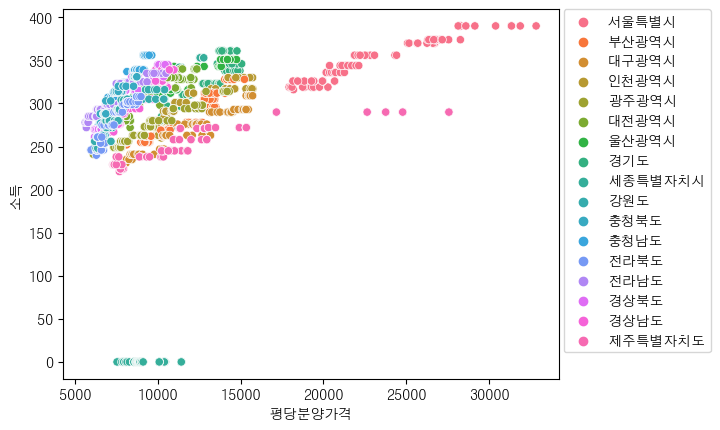

In [55]:
sns.scatterplot(data=df_test,y='소득',x='평당분양가격',hue='행정구역')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

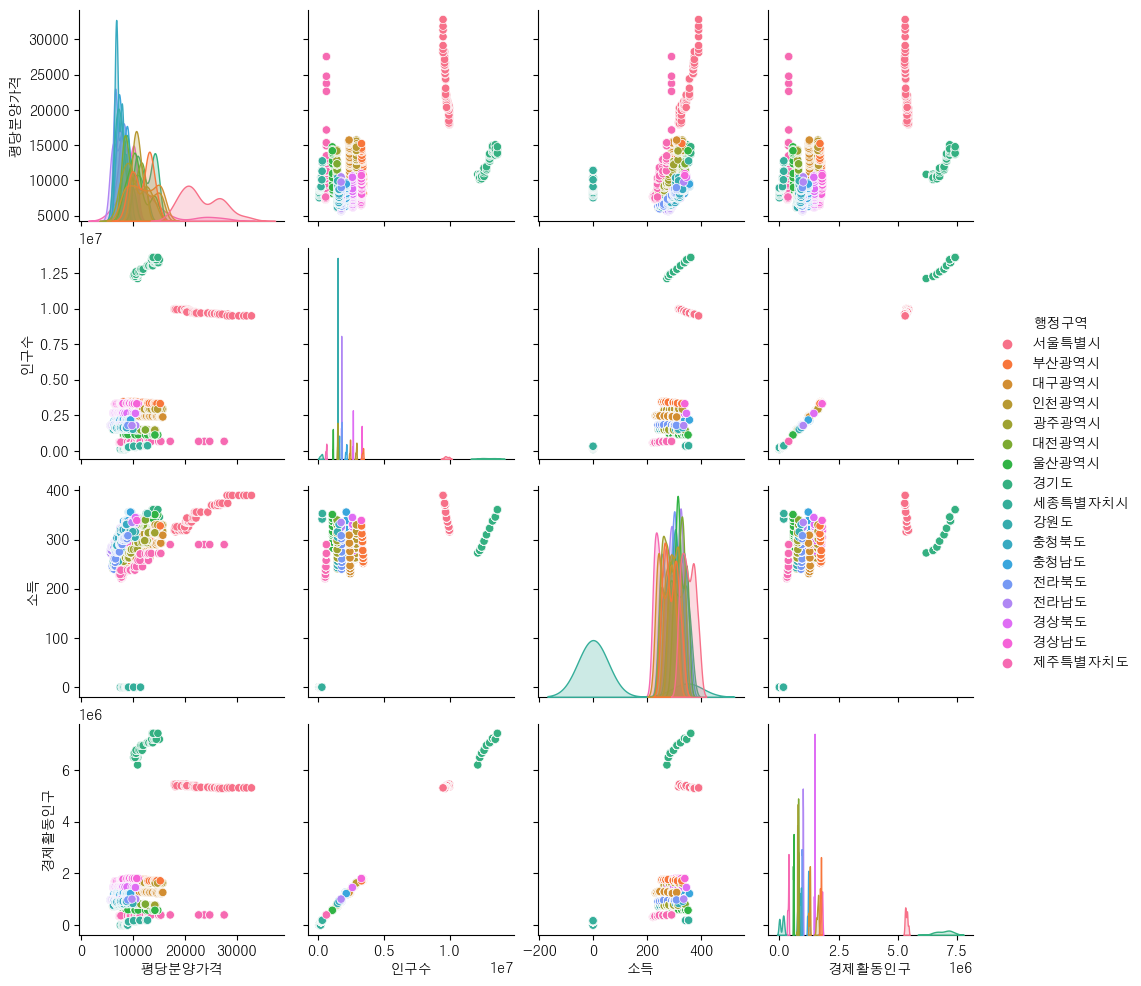

In [42]:
df_last_notnull = df_test.loc[df_test["평당분양가격"].notnull(), 
                          ['행정구역', "평당분양가격", "인구수", "소득",'경제활동인구']]
sns.pairplot(df_last_notnull, hue="행정구역")